In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import re

In [3]:
# get pro-football-reference.com play by play data

df_2002 = pd.read_csv('season_2002.csv')
df_2003 = pd.read_csv('season_2003.csv')
df_2004 = pd.read_csv('season_2004.csv')
df_2005 = pd.read_csv('season_2005.csv')
df_2007 = pd.read_csv('season_2007.csv')
df_2008 = pd.read_csv('season_2008.csv')
df_2009 = pd.read_csv('season_2009.csv')
df_2010 = pd.read_csv('season_2010.csv')
df_2011 = pd.read_csv('season_2011.csv')
df_2012 = pd.read_csv('season_2012.csv')
df_2013 = pd.read_csv('season_2013.csv')
df_2014 = pd.read_csv('season_2014.csv')
df_2015 = pd.read_csv('season_2015.csv')
df_2016 = pd.read_csv('season_2016.csv')
df_2017 = pd.read_csv('season_2017.csv')

df_2002['Season'] = 2002
df_2003['Season'] = 2003
df_2004['Season'] = 2004
df_2005['Season'] = 2005
df_2007['Season'] = 2007
df_2008['Season'] = 2008
df_2009['Season'] = 2009
df_2010['Season'] = 2010
df_2011['Season'] = 2011
df_2012['Season'] = 2012
df_2013['Season'] = 2013
df_2014['Season'] = 2014
df_2015['Season'] = 2015
df_2016['Season'] = 2016
df_2017['Season'] = 2017

df = pd.concat([df_2002, df_2003, df_2004, df_2005, df_2007, df_2008, df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017])

# index counter to be removed
df.drop('Unnamed: 0', axis=1, inplace=True)

df.reset_index(drop=True, inplace=True)

In [4]:
df[:30]

,Week,Home_team,Away_team,Game_type,home_pass_complete_pct,home_pass_complete_pct_def,away_pass_complete_pct,away_pass_complete_pct_def,home_deep_complete_pct,home_deep_complete_pct_def,...,away_pct_games_won,home_pct_games_over,away_pct_games_over,home_last_cover,away_last_cover,home_last_win,away_last_win,home_last_margin,away_last_margin,Season
0,1,NYG,SFO,1,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2002
1,1,BUF,NYJ,2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2002
2,1,CIN,LAC,2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2002
3,1,MIA,DET,2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2002
4,1,JAX,IND,2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2002
5,1,CHI,MIN,2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2002
6,1,CAR,BAL,2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2002
7,1,CLE,KAN,2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2002
8,1,GNB,ATL,2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2002
9,1,WAS,ARI,2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2002


In [5]:
# df = df.join(pd.get_dummies(df_1['Game_type']))

#gt = {0: 'NA', 1:'TNF', 2:'Sunday_AM', 3:'Sunday_PM', 4:'SNF', 5:'MNF', 6:'England', 7:'Saturday'}

gt_df = pd.get_dummies(df['Game_type'])

gt_df.columns = ['NA','TNF','Sunday_AM', 'Sunday_PM','SNF','MNF','England','Saturday']

df = df.join(gt_df.drop('NA', axis=1))

In [6]:
df[0:30]

,Week,Home_team,Away_team,Game_type,home_pass_complete_pct,home_pass_complete_pct_def,away_pass_complete_pct,away_pass_complete_pct_def,home_deep_complete_pct,home_deep_complete_pct_def,...,home_last_margin,away_last_margin,Season,TNF,Sunday_AM,Sunday_PM,SNF,MNF,England,Saturday
0,1,NYG,SFO,1,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,NaN,NaN,2002,1,0,0,0,0,0,0
1,1,BUF,NYJ,2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,NaN,NaN,2002,0,1,0,0,0,0,0
2,1,CIN,LAC,2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,NaN,NaN,2002,0,1,0,0,0,0,0
3,1,MIA,DET,2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,NaN,NaN,2002,0,1,0,0,0,0,0
4,1,JAX,IND,2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,NaN,NaN,2002,0,1,0,0,0,0,0
5,1,CHI,MIN,2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,NaN,NaN,2002,0,1,0,0,0,0,0
6,1,CAR,BAL,2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,NaN,NaN,2002,0,1,0,0,0,0,0
7,1,CLE,KAN,2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,NaN,NaN,2002,0,1,0,0,0,0,0
8,1,GNB,ATL,2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,NaN,NaN,2002,0,1,0,0,0,0,0
9,1,WAS,ARI,2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,NaN,NaN,2002,0,1,0,0,0,0,0


In [7]:
def time_btwn(x):
    week = int(x[0])
    team = x[1]
    season = int(x[2])
    game_t = {0:0, 2:3, 3:3, 4:3, 5:4, 6:3, 7:2}
    try: 
        week_after = df[((df['Week']==week) & (df['Season']==season)) & ((df['Home_team']==team) | (df['Away_team']==team))]['Game_type'].iloc[0]
        try:
            week_before = df[((df['Week']==week-1) & (df['Season']==season)) & ((df['Home_team']==team) | (df['Away_team']==team))]['Game_type'].iloc[0]
            weekly = 7
        except:
            week_before = df[((df['Week']==week-2) & (df['Season']==season)) & ((df['Home_team']==team) | (df['Away_team']==team))]['Game_type'].iloc[0]
            weekly = 14
        tb = game_t[week_after] + weekly - game_t[week_before]
    except:
        tb = 7
    return tb

df['Home_team_days_after_last_game'] = df[['Week','Home_team','Season']].apply(time_btwn, axis=1)
df['Away_team_days_after_last_game'] = df[['Week','Away_team','Season']].apply(time_btwn, axis=1)

In [8]:
df.drop('Game_type', axis=1, inplace=True)
df = df[df.Week!=1]
df.reset_index(drop=True, inplace=True)

In [9]:
for i in df[(df['Week']==2) & (df['Season']==2017)].index:
    if (df['Home_team'].iloc[i]=='MIA') | (df['Home_team'].iloc[i]=='TAM') | (df['Away_team'].iloc[i]=='MIA') | (df['Away_team'].iloc[i]=='TAM'):
        df = df.drop(df.index[i])

In [10]:
df[(df['Week']==2) & (df['Season']==2017)]

,Week,Home_team,Away_team,home_pass_complete_pct,home_pass_complete_pct_def,away_pass_complete_pct,away_pass_complete_pct_def,home_deep_complete_pct,home_deep_complete_pct_def,away_deep_complete_pct,...,Season,TNF,Sunday_AM,Sunday_PM,SNF,MNF,England,Saturday,Home_team_days_after_last_game,Away_team_days_after_last_game
3358,2,CIN,HOU,51.612903,52.941176,52.777778,52.380952,16.666667,0.000000,0.000000,...,2017,1,0,0,0,0,0,0,7,7
3359,2,KAN,PHI,80.000000,44.444444,66.666667,57.500000,42.857143,20.000000,25.000000,...,2017,0,1,0,0,0,0,0,7,7
3360,2,IND,ARI,52.380952,73.333333,56.250000,70.731707,50.000000,83.333333,16.666667,...,2017,0,1,0,0,0,0,0,7,7
3361,2,CAR,BUF,56.000000,68.571429,57.142857,66.666667,60.000000,0.000000,50.000000,...,2017,0,1,0,0,0,0,0,7,7
3362,2,NOR,NWE,72.972973,84.375000,44.444444,80.000000,60.000000,88.888889,20.000000,...,2017,0,1,0,0,0,0,0,6,7
3363,2,PIT,MIN,66.666667,66.666667,84.375000,72.972973,50.000000,30.000000,88.888889,...,2017,0,1,0,0,0,0,0,7,6
3365,2,BAL,CLE,52.941176,51.612903,66.666667,66.666667,0.000000,16.666667,30.000000,...,2017,0,1,0,0,0,0,0,7,7
3366,2,JAX,TEN,52.380952,52.777778,60.975610,68.750000,25.000000,0.000000,50.000000,...,2017,0,1,0,0,0,0,0,7,7
3368,2,OAK,NYJ,68.750000,60.975610,66.666667,57.142857,100.000000,50.000000,33.333333,...,2017,0,0,1,0,0,0,0,7,7
3369,2,DEN,DAL,60.714286,66.666667,61.538462,76.315789,50.000000,33.333333,25.000000,...,2017,0,0,1,0,0,0,0,6,7


In [11]:
df = df.reset_index(drop=True)

In [12]:
df.describe()

,Week,home_pass_complete_pct,home_pass_complete_pct_def,away_pass_complete_pct,away_pass_complete_pct_def,home_deep_complete_pct,home_deep_complete_pct_def,away_deep_complete_pct,away_deep_complete_pct_def,home_yds_per_pass,...,Season,TNF,Sunday_AM,Sunday_PM,SNF,MNF,England,Saturday,Home_team_days_after_last_game,Away_team_days_after_last_game
count,3597.000000,3597.000000,3597.000000,3597.000000,3597.000000,2636.000000,2634.000000,2634.000000,2636.000000,3597.000000,...,3597.000000,3597.000000,3597.000000,3597.000000,3597.000000,3597.000000,3597.000000,3597.000000,3597.000000,3597.000000
mean,9.651932,61.339088,61.619709,61.517631,61.407720,41.103820,41.476326,41.219956,41.256857,7.044697,...,2009.732277,0.041423,0.539338,0.262997,0.064776,0.063664,0.002224,0.021129,7.450653,7.459828
std,4.686211,5.445392,5.034213,5.408898,5.084213,10.539047,10.321668,10.467622,9.848288,0.976214,...,4.669356,0.199295,0.498519,0.440322,0.246165,0.244188,0.047114,0.143833,1.844519,1.802039
min,2.000000,34.042553,34.285714,34.285714,37.704918,0.000000,0.000000,0.000000,0.000000,2.600000,...,2002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
25%,6.000000,57.974684,58.571429,58.104738,58.333333,34.900176,36.000000,35.092385,35.483871,6.461538,...,2005.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,7.000000
50%,10.000000,61.428571,61.538462,61.538462,61.363636,40.625000,41.012821,40.830698,40.816327,7.006192,...,2010.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,7.000000
75%,14.000000,64.939024,64.691943,65.064103,64.444444,47.058824,46.587017,46.808511,46.666667,7.642857,...,2014.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,7.000000
max,17.000000,85.185185,84.375000,86.666667,86.666667,100.000000,100.000000,100.000000,100.000000,14.750000,...,2017.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,15.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3597 entries, 0 to 3596
Data columns (total 86 columns):
Week                              3597 non-null int64
Home_team                         3597 non-null object
Away_team                         3597 non-null object
home_pass_complete_pct            3597 non-null float64
home_pass_complete_pct_def        3597 non-null float64
away_pass_complete_pct            3597 non-null float64
away_pass_complete_pct_def        3597 non-null float64
home_deep_complete_pct            2636 non-null float64
home_deep_complete_pct_def        2634 non-null float64
away_deep_complete_pct            2634 non-null float64
away_deep_complete_pct_def        2636 non-null float64
home_yds_per_pass                 3597 non-null float64
home_yds_per_pass_def             3597 non-null float64
away_yds_per_pass                 3597 non-null float64
away_yds_per_pass_def             3597 non-null float64
home_pass_yds_pg                  3597 non-null float64
h

In [14]:
df['Home_line'] = df['Home_line'].fillna(0)
df['Away_line'] = df['Away_line'].fillna(0)

In [15]:
len(df)

3597

In [16]:
len(df.dropna())

2299

In [17]:
df_dp = df.dropna()

In [18]:
df.columns

Index(['Week', 'Home_team', 'Away_team', 'home_pass_complete_pct',
       'home_pass_complete_pct_def', 'away_pass_complete_pct',
       'away_pass_complete_pct_def', 'home_deep_complete_pct',
       'home_deep_complete_pct_def', 'away_deep_complete_pct',
       'away_deep_complete_pct_def', 'home_yds_per_pass',
       'home_yds_per_pass_def', 'away_yds_per_pass', 'away_yds_per_pass_def',
       'home_pass_yds_pg', 'home_pass_yds_pg_def', 'away_pass_yds_pg',
       'away_pass_yds_pg_def', 'home_interception_pct',
       'home_interception_pct_def', 'away_interception_pct',
       'away_interception_pct_def', 'home_sack_pct', 'home_sack_pct_def',
       'away_sack_pct', 'away_sack_pct_def', 'home_positive_run_pct',
       'home_positive_run_pct_def', 'away_positive_run_pct',
       'away_positive_run_pct_def', 'home_negative_run_pct',
       'home_negative_run_pct_def', 'away_negative_run_pct',
       'away_negative_run_pct_def', 'home_yds_per_rush',
       'home_yds_per_rush_def', 'awa

# PCA and Standardization

In [20]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [21]:
# split df by season to test how we would do on 2017 season with deep pass data

df_test_by_seasondp = df_dp[df_dp['Season']==2017]
df_train_by_seasondp = df_dp[df_dp['Season']!=2017]

y_traindp = df_train_by_seasondp['Home_cover']
X_traindp = df_train_by_seasondp.drop(['Season','Home_team', 'Away_team', 'Home_cover', 'Away_cover'], axis=1)

y_testdp = df_test_by_seasondp['Home_cover']
X_testdp = df_test_by_seasondp.drop(['Season','Home_team', 'Away_team', 'Home_cover', 'Away_cover'], axis=1)

In [22]:
# split df by season to test how we would do on 2017 season without deep pass data
df = df.drop(['home_deep_complete_pct','home_deep_complete_pct_def', 'away_deep_complete_pct', 'away_deep_complete_pct_def'], axis=1).dropna()

df_test_by_season = df[df['Season']==2017]
df_train_by_season = df[df['Season']!=2017]

y_train = df_train_by_season['Home_cover']
X_train = df_train_by_season.drop(['Season','Home_team', 'Away_team', 'Home_cover', 'Away_cover'], axis=1)

y_test = df_test_by_season['Home_cover']
X_test = df_test_by_season.drop(['Season','Home_team', 'Away_team', 'Home_cover', 'Away_cover'], axis=1)

In [23]:
# do it like this so it is repeatable

scaler = preprocessing.StandardScaler().fit(X_train)


X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [24]:
prince = {}
for n in range(78):
    pca = PCA(n_components=n)
    pca.fit(X_scaled_train)
    prince[n] = pca.explained_variance_ratio_.sum()

In [25]:
p_df = pd.Series(prince)
p_df.tail(15)

63    0.987932
64    0.990037
65    0.992064
66    0.993615
67    0.995080
68    0.995929
69    0.996749
70    0.997414
71    0.998030
72    0.998580
73    0.999125
74    0.999548
75    0.999939
76    1.000000
77    1.000000
dtype: float64

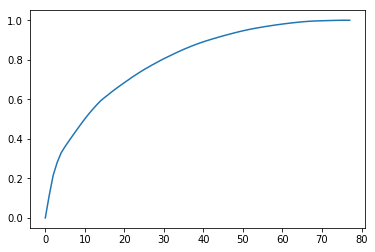

In [26]:
plt.plot(p_df)
plt.show()

In [27]:
''' not enough correlation 
# do it like this so repeatable 

pca = PCA(n_components=78).fit(X_scaled_train)

X_pca_train = pca.transform(X_scaled_train)
X_pca_test = pca.transform(X_scaled_test)'''

' not enough correlation \n# do it like this so repeatable \n\npca = PCA(n_components=78).fit(X_scaled_train)\n\nX_pca_train = pca.transform(X_scaled_train)\nX_pca_test = pca.transform(X_scaled_test)'

In [28]:
# X_pca_train.shape

# Models 

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

In [30]:
params = [{'n_estimators': [5,10,12,15],'max_features': ['auto','log2'], 'max_depth':[6,10,15]}]

clf = GridSearchCV(RandomForestClassifier(random_state=42), params, scoring='accuracy', cv=StratifiedKFold(10)).fit(X_scaled_train, y_train)
clf.cv_results_
clf.best_params_
print('RFC GridSearchCV Best Score: ', clf.best_score_, ' with ' , clf.best_params_)

print('RFC Test Score: ', accuracy_score(y_test, clf.predict(X_scaled_test)))
print('RFC Train Score: ', accuracy_score(y_train, clf.predict(X_scaled_train)))

RFC GridSearchCV Best Score:  0.5306539509536785  with  {'max_depth': 6, 'max_features': 'log2', 'n_estimators': 10}
RFC Test Score:  0.5308056872037915
RFC Train Score:  0.7033378746594006


In [31]:
# how model would have done by week in 2017 for top five predictions random forest

# results are in format of (prediction score, actual result, predicted result, home team, the spread, away team)
o_ats = 0

for week in range(2,18):
    df_test_by_week = df_test_by_season[df_test_by_season['Week']==week]

    y_test_by_week = df_test_by_week['Home_cover']
    X_test_by_week = scaler.transform(df_test_by_week.drop(['Season','Home_team', 'Away_team', 'Home_cover', 'Away_cover'], axis=1))

    guess = list(zip(abs(clf.predict_proba(X_test_by_week)[:,1]-.5), y_test_by_week, [0 if x<.5 else 1 for x in clf.predict_proba(X_test_by_week)[:,1]], df_test_by_week['Home_team'], df_test_by_week['Home_line'], df_test_by_week['Away_team']))
    top5 = sorted(guess, reverse=True)[:5]
    print(top5)
    w = 0
    for acc in top5:
        if (acc[1]==acc[2]):
            w+=1
    o_ats+=w
    print('Week %d record: ' % week)
    print(str(w) +'-' + str(len(top5)-w))
print('\nOverall ATS: ' + str(o_ats) + '-' + str(80-o_ats) + ' (' + str(o_ats/80*100) + '%)')

[(0.22798727097737437, 1, 0, 'OAK', -14.0, 'NYJ'), (0.21668976290418412, 1, 0, 'BAL', -7.5, 'CLE'), (0.21304993330076755, 0, 0, 'JAX', 1.0, 'TEN'), (0.1887602057227466, 1, 0, 'DEN', 2.5, 'DAL'), (0.17382502627162633, 0, 1, 'NOR', 5.5, 'NWE')]
Week 2 record: 
1-4
[(0.17458711444349984, 0, 1, 'MIN', 0.0, 'TAM'), (0.12100433035738212, 0, 0, 'ARI', 3.0, 'DAL'), (0.11297694135929426, 1, 1, 'NYJ', 5.5, 'MIA'), (0.11141531191042697, 1, 1, 'IND', 1.0, 'CLE'), (0.09942611344626356, 1, 0, 'WAS', 3.5, 'OAK')]
Week 3 record: 
3-2
[(0.12963474211380166, 0, 0, 'MIA', 4.0, 'NOR'), (0.12138654107277846, 1, 1, 'SEA', -12.5, 'IND'), (0.10711596922007438, 1, 0, 'DEN', -3.5, 'OAK'), (0.10358167557620801, 0, 0, 'CLE', 3.0, 'CIN'), (0.10300148207126958, 1, 0, 'HOU', 2.5, 'TEN')]
Week 4 record: 
3-2
[(0.12564975070386197, 1, 0, 'IND', -1.0, 'SFO'), (0.11096628730708691, 0, 0, 'PIT', -7.5, 'JAX'), (0.06272136372746273, 0, 1, 'DET', -2.0, 'CAR'), (0.06242232972022577, 0, 1, 'TAM', 3.5, 'NWE'), (0.0586739285387

In [32]:
from sklearn.linear_model import LogisticRegression

n_params = [{'penalty':['l2'], 'C':[.01,.1,1,10,100]}]
clf1 = GridSearchCV(LogisticRegression(), n_params, cv=5, scoring='accuracy').fit(X_scaled_train, y_train)

print('LR GridSearchCV Best Score: ', clf1.best_score_, ' with ' , clf1.best_params_ )

print('LR Test Score: ', accuracy_score(y_test, clf1.predict(X_scaled_test))) 
print('LR Train Score: ', accuracy_score(y_train, clf1.predict(X_scaled_train)))

LR GridSearchCV Best Score:  0.5190735694822888  with  {'C': 1, 'penalty': 'l2'}
LR Test Score:  0.5118483412322274
LR Train Score:  0.5722070844686649


In [33]:
# how model would have done by week in 2017 for top five predictions logistic regression

# results are in format of (prediction score, actual result, predicted result, home team, the spread, away team)
o_ats = 0

for week in range(2,18):
    df_test_by_week = df_test_by_season[df_test_by_season['Week']==week]

    y_test_by_week = df_test_by_week['Home_cover']
    X_test_by_week = scaler.transform(df_test_by_week.drop(['Season','Home_team', 'Away_team', 'Home_cover', 'Away_cover'], axis=1))

    guess = list(zip(abs(clf1.predict_proba(X_test_by_week)[:,1]-.5), y_test_by_week, [0 if x<.5 else 1 for x in clf1.predict_proba(X_test_by_week)[:,1]],df_test_by_week['Home_team'], df_test_by_week['Home_line'], df_test_by_week['Away_team']))
    top5 = sorted(guess, reverse=True)[:5]
    w = 0
    for acc in top5:
        if (acc[1]==acc[2]):
            w+=1
    o_ats+=w
    print('Week %d record: ' % week, end =' ')
    print(str(w) +'-' + str(len(top5)-w))
    print(top5)
print('\nOverall ATS: ' + str(o_ats) + '-' + str(80-o_ats) + ' (' + str(o_ats/80*100) + '%)')

Week 2 record:  3-2
[(0.27128802246841, 0, 0, 'LAR', -3.0, 'WAS'), (0.2347651012478602, 0, 1, 'NYG', -3.0, 'DET'), (0.203751270651641, 1, 0, 'DEN', 2.5, 'DAL'), (0.17897589535549613, 0, 0, 'NOR', 5.5, 'NWE'), (0.1622178609889517, 0, 0, 'CIN', -5.0, 'HOU')]
Week 3 record:  4-1
[(0.1922244367076531, 1, 1, 'JAX', 3.0, 'BAL'), (0.1331755882492257, 0, 1, 'LAC', 3.0, 'KAN'), (0.11735217463977243, 1, 1, 'NYJ', 5.5, 'MIA'), (0.1125773843405613, 0, 0, 'CAR', -5.0, 'NOR'), (0.11039128176060187, 1, 1, 'TEN', -2.0, 'SEA')]
Week 4 record:  0-5
[(0.18392543548619106, 1, 0, 'NYJ', 4.0, 'JAX'), (0.169046446765169, 1, 0, 'KAN', -6.5, 'WAS'), (0.12898518090755862, 0, 1, 'TAM', -2.5, 'NYG'), (0.1021410629727959, 0, 1, 'MIN', -2.5, 'DET'), (0.09521316062544694, 1, 0, 'DEN', -3.5, 'OAK')]
Week 5 record:  3-2
[(0.11228823173894148, 0, 0, 'PIT', -7.5, 'JAX'), (0.10637381407652907, 0, 0, 'MIA', 0.0, 'TEN'), (0.0970701937945605, 0, 1, 'CLE', 1.5, 'NYJ'), (0.0843029150186092, 0, 1, 'NYG', -3.0, 'LAC'), (0.08405

In [34]:
# testing deep learning model
np.random.seed(1337)
import keras
from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras import regularizers

Using TensorFlow backend.
/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [148]:
n_cols = X_train.shape[1]
model = Sequential()
model.add(Dense(80, input_shape = (n_cols,)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(.7))
model.add(Dense(80, kernel_regularizer=regularizers.l2(.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(.7))
model.add(Dense(80, kernel_regularizer=regularizers.l2(.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(.25))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [150]:
# Compile the model
adam = keras.optimizers.Adam(lr=.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test), batch_size=2048,shuffle=False)

adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test), batch_size=1024,shuffle=False)

scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Train on 2936 samples, validate on 211 samples
Epoch 1/300
2936/2936 [==============================] - 2s 787us/step - loss: 0.5985 - acc: 0.6958 - val_loss: 0.9460 - val_acc: 0.5261
Epoch 2/300
2936/2936 [==============================] - 0s 12us/step - loss: 0.6331 - acc: 0.6621 - val_loss: 1.0760 - val_acc: 0.5166
Epoch 3/300
2936/2936 [==============================] - 0s 12us/step - loss: 0.6509 - acc: 0.6635 - val_loss: 1.1441 - val_acc: 0.4834
Epoch 4/300
2936/2936 [==============================] - 0s 12us/step - loss: 0.6831 - acc: 0.6492 - val_loss: 1.1550 - val_acc: 0.4692
Epoch 5/300
2936/2936 [==============================] - 0s 12us/step - loss: 0.6689 - acc: 0.6751 - val_loss: 1.2028 - val_acc: 0.5071
Epoch 6/300
2936/2936 [==============================] - 0s 13us/step - loss: 0.6757 - acc: 0.6860 - val_loss: 1.4482 - val_acc: 0.5166
Epoch 7/300
2936/2936 [==============================] - 0s 13us/step - loss: 0.6879 - acc: 0.6608 - val_loss: 1.6913 - val_acc: 0.5166


2936/2936 [==============================] - 0s 12us/step - loss: 0.6150 - acc: 0.6938 - val_loss: 1.2821 - val_acc: 0.4692
Epoch 61/300
2936/2936 [==============================] - 0s 13us/step - loss: 0.6014 - acc: 0.7047 - val_loss: 1.3546 - val_acc: 0.4597
Epoch 62/300
2936/2936 [==============================] - 0s 12us/step - loss: 0.6060 - acc: 0.6904 - val_loss: 1.5108 - val_acc: 0.4692
Epoch 63/300
2936/2936 [==============================] - 0s 14us/step - loss: 0.6095 - acc: 0.6969 - val_loss: 1.4250 - val_acc: 0.4597
Epoch 64/300
2936/2936 [==============================] - 0s 16us/step - loss: 0.6158 - acc: 0.7074 - val_loss: 1.4487 - val_acc: 0.4597
Epoch 65/300
2936/2936 [==============================] - 0s 15us/step - loss: 0.6059 - acc: 0.7030 - val_loss: 1.3986 - val_acc: 0.4597
Epoch 66/300
2936/2936 [==============================] - 0s 15us/step - loss: 0.6157 - acc: 0.6911 - val_loss: 1.3576 - val_acc: 0.4692
Epoch 67/300
2936/2936 [==============================

Epoch 120/300
2936/2936 [==============================] - 0s 13us/step - loss: 0.6017 - acc: 0.7020 - val_loss: 1.0277 - val_acc: 0.4882
Epoch 121/300
2936/2936 [==============================] - 0s 13us/step - loss: 0.5966 - acc: 0.7119 - val_loss: 1.1682 - val_acc: 0.4692
Epoch 122/300
2936/2936 [==============================] - 0s 13us/step - loss: 0.5960 - acc: 0.7098 - val_loss: 1.2004 - val_acc: 0.4787
Epoch 123/300
2936/2936 [==============================] - 0s 14us/step - loss: 0.6101 - acc: 0.6996 - val_loss: 1.1803 - val_acc: 0.4976
Epoch 124/300
2936/2936 [==============================] - 0s 13us/step - loss: 0.5861 - acc: 0.7136 - val_loss: 1.2649 - val_acc: 0.5118
Epoch 125/300
2936/2936 [==============================] - 0s 14us/step - loss: 0.5986 - acc: 0.6945 - val_loss: 1.3150 - val_acc: 0.4929
Epoch 126/300
2936/2936 [==============================] - 0s 13us/step - loss: 0.5898 - acc: 0.7122 - val_loss: 1.2653 - val_acc: 0.4976
Epoch 127/300
2936/2936 [=========

2936/2936 [==============================] - 0s 12us/step - loss: 0.5787 - acc: 0.7115 - val_loss: 1.0760 - val_acc: 0.4218
Epoch 180/300
2936/2936 [==============================] - 0s 12us/step - loss: 0.5869 - acc: 0.6965 - val_loss: 1.0296 - val_acc: 0.4455
Epoch 181/300
2936/2936 [==============================] - 0s 12us/step - loss: 0.5684 - acc: 0.7027 - val_loss: 1.0259 - val_acc: 0.4834
Epoch 182/300
2936/2936 [==============================] - 0s 13us/step - loss: 0.5587 - acc: 0.7248 - val_loss: 1.0949 - val_acc: 0.5213
Epoch 183/300
2936/2936 [==============================] - 0s 14us/step - loss: 0.5792 - acc: 0.7081 - val_loss: 1.1611 - val_acc: 0.4976
Epoch 184/300
2936/2936 [==============================] - 0s 13us/step - loss: 0.5771 - acc: 0.7221 - val_loss: 1.2500 - val_acc: 0.4834
Epoch 185/300
2936/2936 [==============================] - 0s 12us/step - loss: 0.5805 - acc: 0.7187 - val_loss: 1.1419 - val_acc: 0.4929
Epoch 186/300
2936/2936 [=======================

2936/2936 [==============================] - 0s 13us/step - loss: 0.5773 - acc: 0.7057 - val_loss: 1.2130 - val_acc: 0.5213
Epoch 239/300
2936/2936 [==============================] - 0s 13us/step - loss: 0.5742 - acc: 0.7040 - val_loss: 1.1763 - val_acc: 0.5213
Epoch 240/300
2936/2936 [==============================] - 0s 12us/step - loss: 0.5586 - acc: 0.7207 - val_loss: 1.1639 - val_acc: 0.5118
Epoch 241/300
2936/2936 [==============================] - 0s 14us/step - loss: 0.5507 - acc: 0.7316 - val_loss: 1.2567 - val_acc: 0.4976
Epoch 242/300
2936/2936 [==============================] - 0s 13us/step - loss: 0.5577 - acc: 0.7272 - val_loss: 1.3665 - val_acc: 0.5024
Epoch 243/300
2936/2936 [==============================] - 0s 13us/step - loss: 0.5710 - acc: 0.7054 - val_loss: 1.4034 - val_acc: 0.4882
Epoch 244/300
2936/2936 [==============================] - 0s 13us/step - loss: 0.5684 - acc: 0.7044 - val_loss: 1.2672 - val_acc: 0.4882
Epoch 245/300
2936/2936 [=======================

2936/2936 [==============================] - 0s 12us/step - loss: 0.5573 - acc: 0.7187 - val_loss: 1.2004 - val_acc: 0.4313
Epoch 298/300
2936/2936 [==============================] - 0s 13us/step - loss: 0.5461 - acc: 0.7139 - val_loss: 1.1458 - val_acc: 0.4739
Epoch 299/300
2936/2936 [==============================] - 0s 12us/step - loss: 0.5692 - acc: 0.7173 - val_loss: 1.1082 - val_acc: 0.4692
Epoch 300/300
2936/2936 [==============================] - 0s 14us/step - loss: 0.5497 - acc: 0.7067 - val_loss: 1.0631 - val_acc: 0.4834
Train on 2936 samples, validate on 211 samples
Epoch 1/150
2936/2936 [==============================] - 2s 804us/step - loss: 0.5525 - acc: 0.7149 - val_loss: 1.0272 - val_acc: 0.4739
Epoch 2/150
2936/2936 [==============================] - 0s 12us/step - loss: 0.5520 - acc: 0.7033 - val_loss: 1.0074 - val_acc: 0.4976
Epoch 3/150
2936/2936 [==============================] - 0s 12us/step - loss: 0.5242 - acc: 0.7289 - val_loss: 1.0050 - val_acc: 0.4739
Epoch 

2936/2936 [==============================] - 0s 11us/step - loss: 0.4624 - acc: 0.7493 - val_loss: 0.8909 - val_acc: 0.4787
Epoch 57/150
2936/2936 [==============================] - 0s 10us/step - loss: 0.4725 - acc: 0.7326 - val_loss: 0.8922 - val_acc: 0.4882
Epoch 58/150
2936/2936 [==============================] - 0s 11us/step - loss: 0.4565 - acc: 0.7405 - val_loss: 0.8922 - val_acc: 0.4834
Epoch 59/150
2936/2936 [==============================] - 0s 10us/step - loss: 0.4569 - acc: 0.7463 - val_loss: 0.8949 - val_acc: 0.4929
Epoch 60/150
2936/2936 [==============================] - 0s 12us/step - loss: 0.4544 - acc: 0.7442 - val_loss: 0.9017 - val_acc: 0.4929
Epoch 61/150
2936/2936 [==============================] - 0s 14us/step - loss: 0.4508 - acc: 0.7561 - val_loss: 0.9074 - val_acc: 0.4882
Epoch 62/150
2936/2936 [==============================] - 0s 12us/step - loss: 0.4606 - acc: 0.7446 - val_loss: 0.9082 - val_acc: 0.5213
Epoch 63/150
2936/2936 [==============================

Epoch 116/150
2936/2936 [==============================] - 0s 11us/step - loss: 0.4597 - acc: 0.7476 - val_loss: 1.0496 - val_acc: 0.4834
Epoch 117/150
2936/2936 [==============================] - 0s 11us/step - loss: 0.4481 - acc: 0.7657 - val_loss: 1.0542 - val_acc: 0.4882
Epoch 118/150
2936/2936 [==============================] - 0s 13us/step - loss: 0.4737 - acc: 0.7422 - val_loss: 1.0639 - val_acc: 0.5024
Epoch 119/150
2936/2936 [==============================] - 0s 13us/step - loss: 0.4431 - acc: 0.7456 - val_loss: 1.0458 - val_acc: 0.5071
Epoch 120/150
2936/2936 [==============================] - 0s 12us/step - loss: 0.4530 - acc: 0.7575 - val_loss: 1.0238 - val_acc: 0.5024
Epoch 121/150
2936/2936 [==============================] - 0s 12us/step - loss: 0.4548 - acc: 0.7435 - val_loss: 1.0141 - val_acc: 0.4976
Epoch 122/150
2936/2936 [==============================] - 0s 13us/step - loss: 0.4442 - acc: 0.7572 - val_loss: 1.0185 - val_acc: 0.4929
Epoch 123/150
2936/2936 [=========

In [151]:
# by week deep learning

# results are in format of (prediction score, actual result, predicted result, home team, the spread, away team)
o_ats = 0

for week in range(2,18):
    df_test_by_week = df_test_by_season[df_test_by_season['Week']==week]

    y_test_by_week = df_test_by_week['Home_cover']
    X_test_by_week = df_test_by_week.drop(['Season','Home_team', 'Away_team', 'Home_cover', 'Away_cover'], axis=1)

    guess = list(zip(abs(model.predict(X_test_by_week)-.5), y_test_by_week, [0 if x<.5 else 1 for x in model.predict(X_test_by_week)],df_test_by_week['Home_team'], df_test_by_week['Home_line'], df_test_by_week['Away_team']))
    top5 = sorted(guess, reverse=True)[:5]
    w = 0
    for acc in top5:
        if (acc[1]==acc[2]):
            w+=1
    o_ats+=w
    print('Week %d record: ' % week, end = ' ')
    print(str(w) +'-' + str(len(top5)-w))
    print(top5)
print('\nOverall ATS: ' + str(o_ats) + '-' + str(80-o_ats) + ' (' + str(o_ats/80*100) + '%)')

Week 2 record:  2-3
[(array([0.49996847], dtype=float32), 0, 0, 'LAR', -3.0, 'WAS'), (array([0.4994596], dtype=float32), 1, 0, 'DEN', 2.5, 'DAL'), (array([0.4992205], dtype=float32), 1, 0, 'KAN', -4.0, 'PHI'), (array([0.4966817], dtype=float32), 1, 0, 'OAK', -14.0, 'NYJ'), (array([0.49514967], dtype=float32), 1, 1, 'ATL', -3.0, 'GNB')]
Week 3 record:  4-1
[(array([0.49957022], dtype=float32), 0, 0, 'CAR', -5.0, 'NOR'), (array([0.49717733], dtype=float32), 0, 0, 'MIN', 0.0, 'TAM'), (array([0.4967906], dtype=float32), 0, 1, 'LAC', 3.0, 'KAN'), (array([0.4672528], dtype=float32), 0, 0, 'ARI', 3.0, 'DAL'), (array([0.4475971], dtype=float32), 1, 1, 'CHI', 7.0, 'PIT')]
Week 4 record:  2-3
[(array([0.49601915], dtype=float32), 0, 0, 'MIA', 4.0, 'NOR'), (array([0.47467262], dtype=float32), 1, 0, 'DEN', -3.5, 'OAK'), (array([0.46377856], dtype=float32), 0, 1, 'TAM', -2.5, 'NYG'), (array([0.4605444], dtype=float32), 1, 0, 'NYJ', 4.0, 'JAX'), (array([0.43053883], dtype=float32), 0, 0, 'ATL', -8.0

In [152]:
X_scaled_train.shape

(2936, 77)

# Prediction

In [153]:
test = pd.read_csv('season_2018_week_2.csv')
test['Season'] = 2018

In [154]:
test.tail()

,Unnamed: 0,Unnamed: 0.1,Week,Home_team,Away_team,Game_type,home_pass_complete_pct,home_pass_complete_pct_def,away_pass_complete_pct,away_pass_complete_pct_def,...,away_pct_games_won,home_pct_games_over,away_pct_games_over,home_last_cover,away_last_cover,home_last_win,away_last_win,home_last_margin,away_last_margin,Season
43,43,43,3,LAR,LAC,3,64.615385,68.656716,73.076923,55.000000,...,50.0,0.0,100.0,1.0,1.0,1.0,1.0,34.0,11.0,2018
44,44,44,3,ARI,CHI,3,60.655738,72.580645,69.565217,63.013699,...,50.0,0.0,50.0,0.0,1.0,0.0,1.0,-34.0,7.0,2018
45,45,45,3,SEA,DAL,3,59.420290,68.493151,64.814815,71.428571,...,50.0,50.0,0.0,0.0,1.0,0.0,1.0,-7.0,7.0,2018
46,46,46,3,DET,NWE,4,60.000000,72.340426,67.567568,58.227848,...,50.0,100.0,50.0,1.0,0.0,0.0,0.0,-3.0,-11.0,2018
47,47,47,3,TAM,PIT,5,78.688525,77.419355,61.386139,55.882353,...,0.0,100.0,100.0,1.0,0.0,1.0,0.0,6.0,-5.0,2018


In [155]:
test = test.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [156]:
test = test.dropna(subset=['Week'])

In [157]:
test.Game_type.unique()

array([1, 2, 3, 4, 5])

In [158]:
#['NA','TNF','Sunday_AM', 'Sunday_PM','SNF','MNF','England','Saturday']

gt_df_t = pd.get_dummies(test['Game_type'])

gt_df_t.columns = ['TNF','Sunday_AM', 'Sunday_PM','SNF','MNF']

gt_df_t['England'] = 0
gt_df_t['Saturday'] = 0 

test = test.join(gt_df_t)

In [159]:
test['Home_team_days_after_last_game'] = test[['Week','Home_team','Season']].apply(time_btwn, axis=1)
test['Away_team_days_after_last_game'] = test[['Week','Away_team','Season']].apply(time_btwn, axis=1)

In [160]:
test.drop('Game_type', axis=1, inplace=True)
test = test[test.Week!=1]
test = test[test.Week!=2]
test.reset_index(drop=True, inplace=True)

In [161]:
test.Home_line = test.Home_line.fillna(0)
test.Away_line = test.Away_line.fillna(0)

In [162]:
model_test = test.drop(['Season','Home_team', 'Away_team', 'home_deep_complete_pct', 'Home_cover','Away_cover',
                  'home_deep_complete_pct_def', 'away_deep_complete_pct', 'away_deep_complete_pct_def'], axis=1)

In [163]:
rank = list(zip(abs(model.predict(model_test)-.5),  [0 if y<.5 else 1 for y in model.predict(model_test)],test['Home_team'], test['Home_line'], test['Away_team']))

tops = sorted(rank, reverse=True)

top = [print(x, end = '\n') for x in tops]



(array([0.49442708], dtype=float32), 0, 'PHI', -6.5, 'IND')
(array([0.47983325], dtype=float32), 1, 'TAM', 1.0, 'PIT')
(array([0.4762769], dtype=float32), 0, 'JAX', -9.5, 'TEN')
(array([0.47030976], dtype=float32), 0, 'MIA', -3.0, 'OAK')
(array([0.4700843], dtype=float32), 0, 'DET', 7.0, 'NWE')
(array([0.46231002], dtype=float32), 0, 'WAS', 2.5, 'GNB')
(array([0.46089217], dtype=float32), 0, 'MIN', -16.5, 'BUF')
(array([0.44937462], dtype=float32), 0, 'CLE', -3.0, 'NYJ')
(array([0.4438936], dtype=float32), 1, 'HOU', -6.5, 'NYG')
(array([0.4281326], dtype=float32), 1, 'BAL', -5.5, 'DEN')
(array([0.32335907], dtype=float32), 0, 'ATL', -3.0, 'NOR')
(array([0.14650309], dtype=float32), 1, 'ARI', 6.0, 'CHI')
(array([0.07717666], dtype=float32), 0, 'SEA', -2.0, 'DAL')
(array([0.03340578], dtype=float32), 1, 'LAR', -7.0, 'LAC')
(array([0.01580751], dtype=float32), 1, 'CAR', -3.0, 'CIN')
(array([0.00963405], dtype=float32), 0, 'KAN', -6.5, 'SFO')


In [164]:
top = [print(x, end = '\n') for x in rank]

(array([0.44937462], dtype=float32), 0, 'CLE', -3.0, 'NYJ')
(array([0.00963405], dtype=float32), 0, 'KAN', -6.5, 'SFO')
(array([0.4438936], dtype=float32), 1, 'HOU', -6.5, 'NYG')
(array([0.01580751], dtype=float32), 1, 'CAR', -3.0, 'CIN')
(array([0.32335907], dtype=float32), 0, 'ATL', -3.0, 'NOR')
(array([0.46089217], dtype=float32), 0, 'MIN', -16.5, 'BUF')
(array([0.46231002], dtype=float32), 0, 'WAS', 2.5, 'GNB')
(array([0.47030976], dtype=float32), 0, 'MIA', -3.0, 'OAK')
(array([0.4762769], dtype=float32), 0, 'JAX', -9.5, 'TEN')
(array([0.4281326], dtype=float32), 1, 'BAL', -5.5, 'DEN')
(array([0.49442708], dtype=float32), 0, 'PHI', -6.5, 'IND')
(array([0.03340578], dtype=float32), 1, 'LAR', -7.0, 'LAC')
(array([0.14650309], dtype=float32), 1, 'ARI', 6.0, 'CHI')
(array([0.07717666], dtype=float32), 0, 'SEA', -2.0, 'DAL')
(array([0.4700843], dtype=float32), 0, 'DET', 7.0, 'NWE')
(array([0.47983325], dtype=float32), 1, 'TAM', 1.0, 'PIT')
